In [1]:
# Base libraries
import pandas as pd
import numpy as np

#pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## EDA

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [8]:
# date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [9]:
# Check nulls
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [10]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Break into Numerical and Categorical

In [11]:
categorical=customer_df.select_dtypes(include=object)
numerical=customer_df.select_dtypes(include=np.number)

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


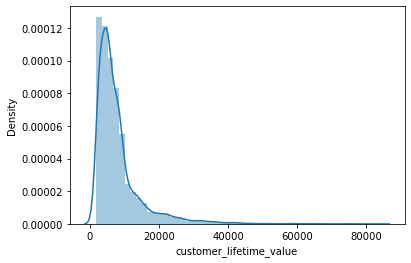

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


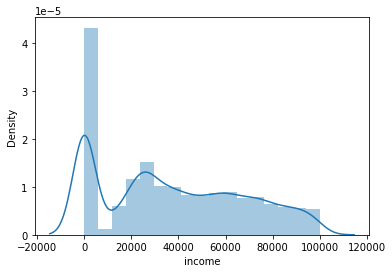

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


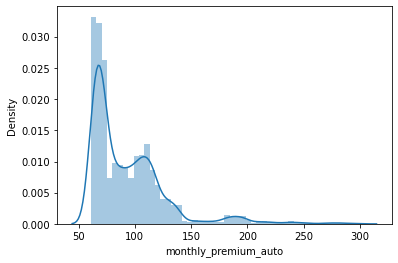

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


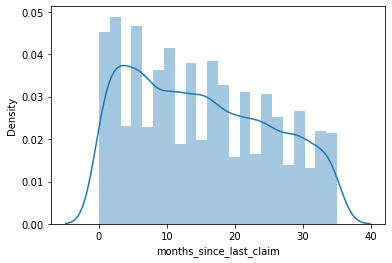

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


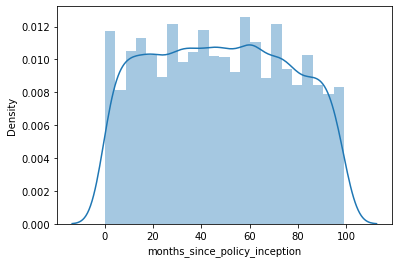

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


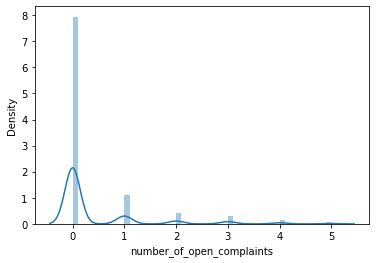

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


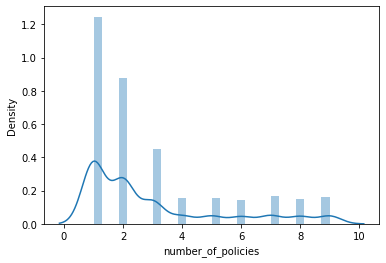

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


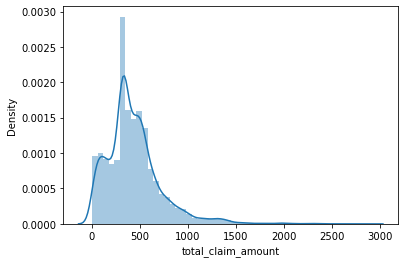

In [12]:
def plot_num(Dataframe):
    for column in Dataframe.columns:
        sns.distplot(a=Dataframe[column])
        plt.show()
    return None
   

plot_num(numerical)

## Checking for outliers

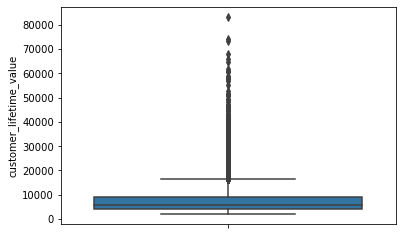

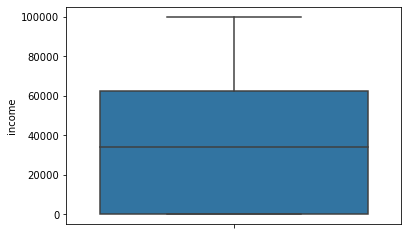

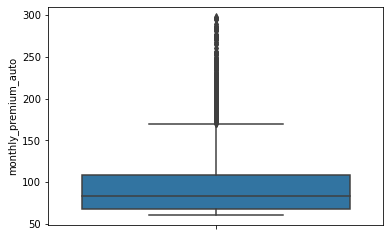

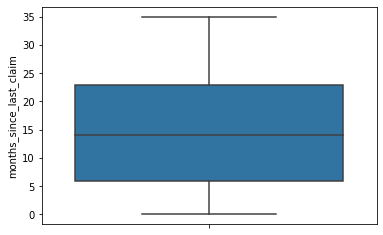

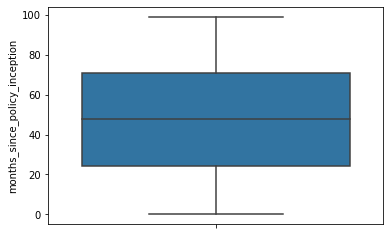

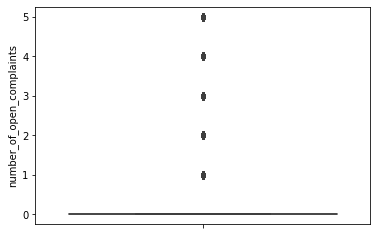

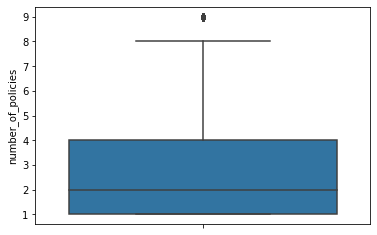

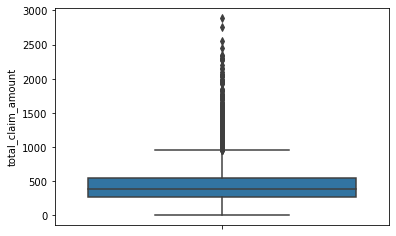

In [13]:
def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(y=Dataframe[column])
        plt.show()
    return None
   

outlier(numerical)

### Columns with outliers

* customer_lifetime_value (does not seem to be too outlierish) leaving in 
* monthly_premium_auto (does not seem to be too outlierish) leaving in
* total_claim_amount (this is target, will not remove)

In [14]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [15]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [16]:
def value_count(df):
    for columns in df:
            print (columns,':     ',len(numerical[columns].value_counts()))
    return

value_count(numerical)
        
#print(len(numerical.customer_lifetime_value.value_counts()))        

customer_lifetime_value :      8041
income :      5694
monthly_premium_auto :      202
months_since_last_claim :      36
months_since_policy_inception :      100
number_of_open_complaints :      6
number_of_policies :      9
total_claim_amount :      5106


In [ ]:
# print(len(numerical.customer_lifetime_value.value_counts()))
# print(len(numerical.income.value_counts()))
# print(len(numerical.monthly_premium_auto.value_counts()))
# print(len(numerical.months_since_last_claim.value_counts()))
# print(len(numerical.months_since_policy_inception.value_counts()))
# print(len(numerical.number_of_open_complaints.value_counts()))
# print(len(numerical.number_of_policies.value_counts()))
# print(len(numerical.total_claim_amount.value_counts()))

In [17]:
print('Old Shape', numerical.shape)

Old Shape (9134, 8)


In [18]:
def outliers(column, threshold = 3):
   
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return data

In [19]:
CLV_outliers = outliers(numerical["customer_lifetime_value"])
MPA_outliers = outliers(numerical["monthly_premium_auto"])


In [20]:
len(CLV_outliers)

211

In [21]:
len(MPA_outliers)

200

In [ ]:
#to_drop = CLV_outliers.index | MPA_outliers.index # Union

In [ ]:
# clean_numerical = numerical.drop(to_drop).reset_index(drop = True)
# clean_numerical.isna().sum()

In [ ]:
#categorical = categorical.drop(to_drop).reset_index(drop = True)

In [ ]:
 #print("New Shape: ", clean_numerical.shape)

## Looking at Categorical features

In [22]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [23]:
# customer has all unique values, dropping before I plot
categorical= categorical.drop(['customer'], axis = 1)

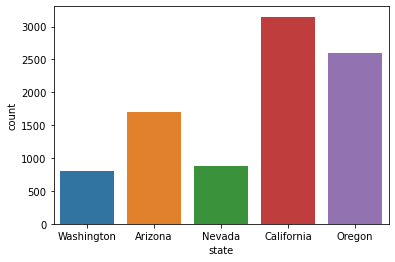

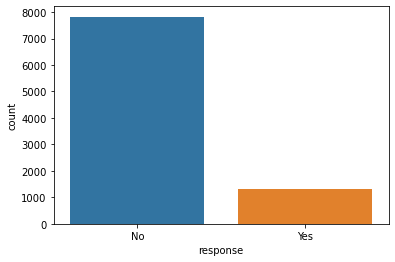

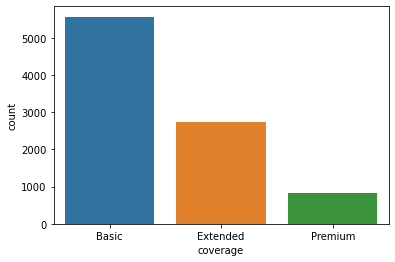

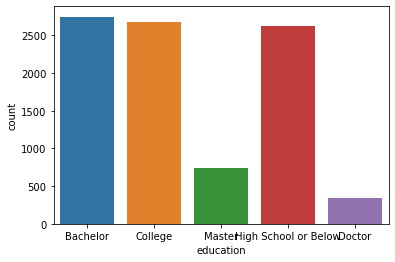

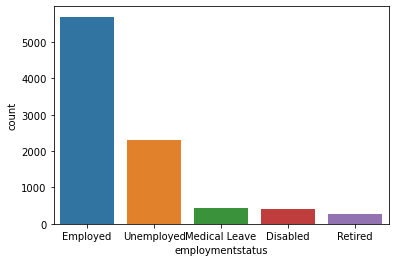

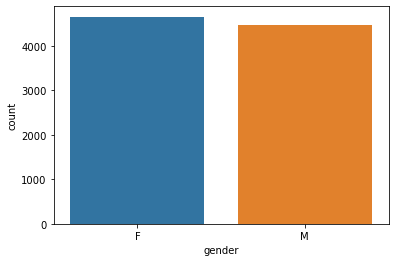

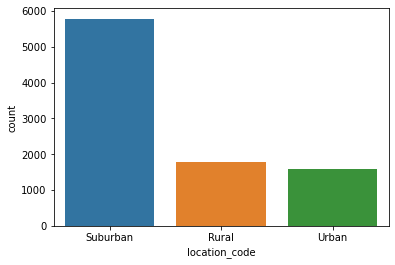

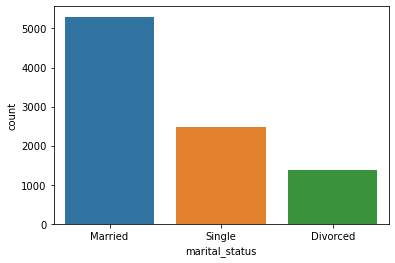

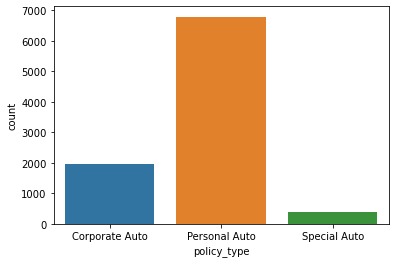

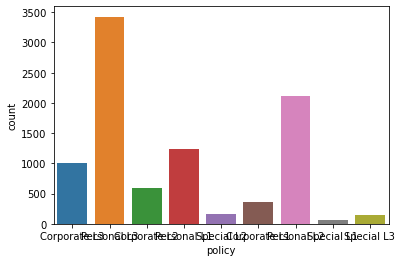

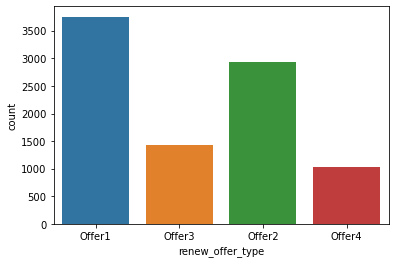

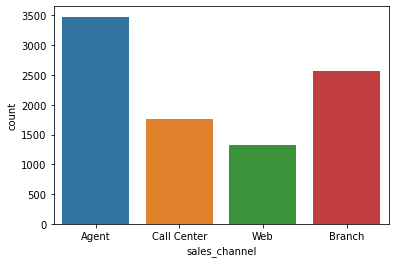

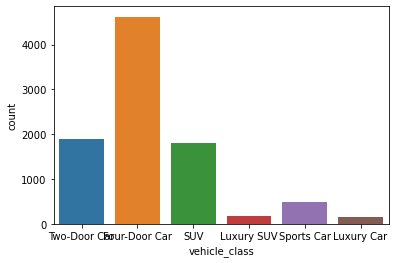

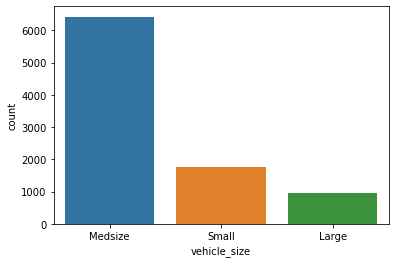

In [24]:
def plot_cat(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.show()
    return None
   

plot_cat(categorical)


## Insights into categorical data
column | decision
-------|---------
state | only 5 - leave as is
response | imbalanced make 1,0
coverage| ordinal encode
education | combine master & dr.
employment status | smallest 3 into other
gender | 1hot encode
location | ordinal encode as is
marital | 1hot encode as is
policy type | combine corporate/special
policy | drop column
renew offer | encode as is
sales channel | 1hot encode as is
vehicle class | 1hot combine luxury/sports
vehicle size | ordinal encode

## Finding discrete and continuous columns

In [25]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.01):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
   
        

In [26]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [27]:
print('Discrete List:  ',discrete_lst)
print('Cotinuous List:   ',continuous_lst)

Discrete List:   ['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']
Cotinuous List:    ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']


In [28]:
num_discrete_df = numerical[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
num_continuous_df = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']]

# Checking Correlations

In [29]:
correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


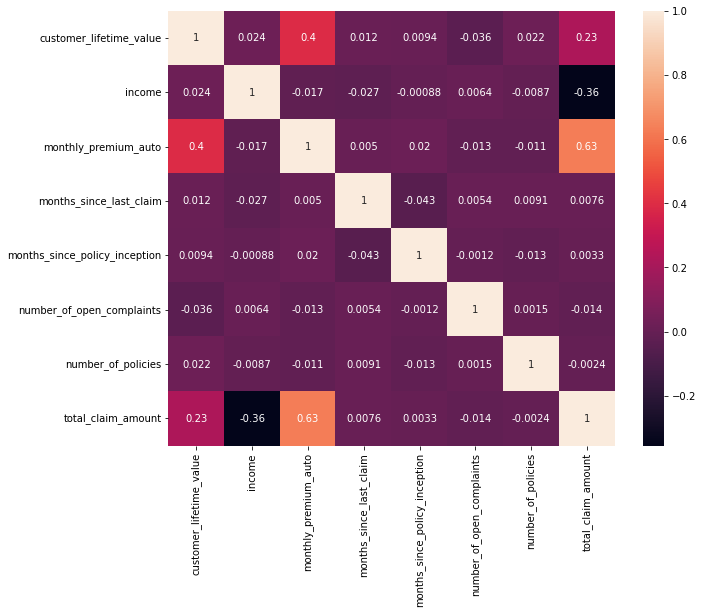

In [30]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

## Working with categoricals

In [31]:
categorical_columns = [col for col in categorical if (len(categorical[col].unique()) < (numerical.shape[0] * 0.01))]

In [32]:
print(categorical_columns)

['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


### Check if any columns are different

In [33]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Dummy code for ordinal encoding
#### data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [34]:
categorical["coverage"] = categorical["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [35]:
categorical['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [36]:
categorical["education"] =categorical["education"].map({"High School or Below" : 0, "Bachelor" : .5, "College":.5, "Master" : 1, "Doctor":1})


In [37]:
categorical["employmentstatus"] = categorical["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})


In [38]:
categorical["location_code"] =categorical["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})

In [39]:
categorical["vehicle_size"] =categorical["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [40]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,0.5


In [ ]:
#categorical = categorical.drop(['policy'], axis=1)

In [41]:
# Simão had a great solution for this


categorical.policy = categorical.policy.str.replace("\w* ",' ')

'''If we look with care to these two columns we can see that the first part of all policis 
correspond to the policy type, so with the above code we simply drop the part on Policy 
that's redundant. With this after encoding we will end up with just 4 columns in total, 
when before there would be 10. We save 6 columns and get the exact same information.'''

categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0.0,0.5,2.0,M,1.0,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,0.5
9130,California,Yes,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,0.5
9131,California,No,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,0.5
9132,California,No,0.5,0.5,2.0,M,0.5,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,1.0


In [42]:
X_all=pd.concat([numerical, categorical], axis=1)
X_all.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,2.0,F,0.5,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,0.5
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,0.0,F,0.5,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,0.5
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,2.0,F,0.5,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,0.5
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,0.0,M,0.5,Married,Corporate Auto,L2,Offer1,Call Center,SUV,0.5
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,2.0,M,0.0,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,0.5


### Processing for the X y split
### X=features  y=target

In [43]:
X=X_all.drop('total_claim_amount', axis=1)
y=X_all['total_claim_amount']

In [44]:
X.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Train/test/split data
### Splitting / Scaling / 1Hot encoding X_train and X_test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (7307, 21)
y_train shape is: (7307,)
X_test shape is: (1827, 21)
y_train shape is: (1827,)


## Break into numerical and categorical

In [46]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat =X_train.select_dtypes(include = object)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [47]:
X_train_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
1212,5328.835851,81064,70,20,4,4,3,0.0,0.5,2.0,0.0,1.0
5656,2602.650842,41958,66,15,49,1,1,0.0,1.0,2.0,1.0,0.0
7437,4864.527356,37406,122,23,38,1,1,0.5,0.5,2.0,0.5,0.0
3274,8002.308333,0,107,3,65,0,3,0.0,0.5,0.0,0.5,0.5
5153,13345.135450,80277,112,6,40,1,2,0.0,0.5,2.0,0.0,0.5


### Initialize and fit the scaler

In [48]:
transformer = MinMaxScaler().fit(X_train_num)

In [49]:
X_norm1 = transformer.transform(X_train_num)
X_train_scale = pd.DataFrame(X_norm1, columns=X_train_num.columns)
X_train_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.042134,0.810794,0.038136,0.571429,0.040404,0.8,0.250,0.0,0.5,1.0,0.0,1.0
1,0.008654,0.419660,0.021186,0.428571,0.494949,0.2,0.000,0.0,1.0,1.0,1.0,0.0
2,0.036431,0.374131,0.258475,0.657143,0.383838,0.2,0.000,0.5,0.5,1.0,0.5,0.0
3,0.074966,0.000000,0.194915,0.085714,0.656566,0.0,0.250,0.0,0.5,0.0,0.5,0.5
4,0.140581,0.802923,0.216102,0.171429,0.404040,0.2,0.125,0.0,0.5,1.0,0.0,0.5


In [50]:
X_norm2 = transformer.transform(X_test_num)
X_test_scale = pd.DataFrame(X_norm2, columns=X_test_num.columns)
X_test_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.006821,0.837879,0.004237,0.371429,0.767677,0.0,0.000,0.0,0.5,1.0,0.0,1.0
1,0.083444,0.977866,0.046610,0.628571,0.141414,0.0,0.125,0.0,0.0,1.0,0.0,0.5
2,0.043305,0.674268,0.029661,0.200000,0.373737,0.0,0.875,0.0,0.5,1.0,0.0,0.5
3,0.023898,0.439954,0.148305,0.828571,0.171717,0.0,0.000,0.5,0.5,1.0,0.5,0.5
4,0.033779,0.000000,0.254237,0.314286,0.101010,0.0,0.000,0.5,0.5,0.0,0.5,0.5


In [51]:
X_train_cat.head(1)

,state,response,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
1212,California,No,F,Single,Personal Auto,L3,Offer1,Agent,Two-Door Car


## 1-hot encoding the train and test

In [52]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head()


<IPython.core.display.Javascript object>

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Concatinating the scaled numericals and the encoded categories

In [54]:
X_train = pd.concat([X_train_cat_encode, X_train_scale], axis = 1)
X_test = pd.concat([X_test_cat_encode, X_test_scale], axis = 1)

In [55]:
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (7307, 35)
y_train shape is: (7307,)
X_test shape is: (1827, 35)
y_train shape is: (1827,)


##  Models

In [56]:
# Define function to run all models
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


In [60]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(max_iter = 2000),DecisionTreeRegressor(),RandomForestRegressor()]

models_automation(model_list, X_train, y_train)



LinearRegression: Train -> 0.6287927450604959, Test -> 0.6247551817208549
SGDRegressor: Train -> 0.6239985035849571, Test -> 0.6161471852255388
KNeighborsRegressor: Train -> 0.6262914794055948, Test -> 0.44041240054081454
MLPRegressor: Train -> 0.8518669940546398, Test -> 0.8249079955719861
DecisionTreeRegressor: Train -> 1.0, Test -> 0.6864361309167326
RandomForestRegressor: Train -> 0.9768407091610176, Test -> 0.8371150942941551


### It looks like the Random Forest Regressor had the best results

In [ ]:
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('FOREST',RandomForestRegressor))
# seed = 7
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
# 	kfold = model_selection.KFold(n_splits=10,)
# 	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)



In [ ]:
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [ ]:
# # boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()


In [ ]:
# LR = LinearRegression()
# LR.fit(X_train, y_train)
# print('training set score:{:3f}'.format(LR.score(X_train,y_train)))
# print('test set score:{:3f}'.format(LR.score(X_test,y_test)))

In [ ]:
#from sklearn.metrics import confusion_matrix

In [ ]:
#prediction = LinearRegression.predict(X_test)

In [ ]:
#confusion_matrix(y_test, prediction)